# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

found_cities = []
latitudes = []
longitudes = []
max_temp = []
humidity=[]
clouds =[]
wind_speeds=[]
country= []
dates = [] 

random_cities = ['jamestown', "butaritari","yerbogachen", "cape town",'touba']
count = 0
sets = 1
print("Beginning Data Retrieval ")
print("-----------------------------")
for city in cities:
    try:
        response = requests.get(query_url+ city).json()
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        found_cities.append(city)
        if count >49:
            count = 1
            sets +=1
            
        else:
            count +=1
        print(f" Processing Record {count} of Set {sets} | {city}")
    except:
        print(f"City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete  ")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
 Processing Record 1 of Set 1 | tondano
 Processing Record 2 of Set 1 | barrow
 Processing Record 3 of Set 1 | rikitea
 Processing Record 4 of Set 1 | severo-kurilsk
 Processing Record 5 of Set 1 | kabakovo
 Processing Record 6 of Set 1 | karratha
 Processing Record 7 of Set 1 | arroio grande
 Processing Record 8 of Set 1 | isangel
 Processing Record 9 of Set 1 | port alfred
 Processing Record 10 of Set 1 | zemetchino
 Processing Record 11 of Set 1 | hithadhoo
 Processing Record 12 of Set 1 | kahului
 Processing Record 13 of Set 1 | ushuaia
 Processing Record 14 of Set 1 | punta arenas
 Processing Record 15 of Set 1 | hilo
 Processing Record 16 of Set 1 | mahebourg
 Processing Record 17 of Set 1 | dikson
 Processing Record 18 of Set 1 | kapaa
 Processing Record 19 of Set 1 | werda
 Processing Record 20 of Set 1 | codrington
 Processing Record 21 of Set 1 | san buenaventura
 Processing Record 22 of Set 1 | mataura
 Processing Recor

City not found. Skipping...
 Processing Record 36 of Set 4 | mar del plata
 Processing Record 37 of Set 4 | aksarka
 Processing Record 38 of Set 4 | irtyshskiy
 Processing Record 39 of Set 4 | axim
 Processing Record 40 of Set 4 | pampa
City not found. Skipping...
 Processing Record 41 of Set 4 | petropavlovka
 Processing Record 42 of Set 4 | ust-kuyga
 Processing Record 43 of Set 4 | liepaja
 Processing Record 44 of Set 4 | hargeysa
 Processing Record 45 of Set 4 | yellowknife
 Processing Record 46 of Set 4 | rafaela
 Processing Record 47 of Set 4 | dicabisagan
 Processing Record 48 of Set 4 | rawson
City not found. Skipping...
 Processing Record 49 of Set 4 | puerto carreno
 Processing Record 50 of Set 4 | portland
 Processing Record 1 of Set 5 | miles city
 Processing Record 2 of Set 5 | tiznit
 Processing Record 3 of Set 5 | talnakh
 Processing Record 4 of Set 5 | kenora
 Processing Record 5 of Set 5 | timra
 Processing Record 6 of Set 5 | dengfeng
 Processing Record 7 of Set 5 | t

 Processing Record 18 of Set 8 | monte alegre
 Processing Record 19 of Set 8 | bassila
 Processing Record 20 of Set 8 | port hardy
 Processing Record 21 of Set 8 | beloha
 Processing Record 22 of Set 8 | coolum beach
 Processing Record 23 of Set 8 | diamantino
 Processing Record 24 of Set 8 | bure
 Processing Record 25 of Set 8 | bardiyah
 Processing Record 26 of Set 8 | uarini
City not found. Skipping...
 Processing Record 27 of Set 8 | ketchikan
 Processing Record 28 of Set 8 | meulaboh
 Processing Record 29 of Set 8 | ulladulla
 Processing Record 30 of Set 8 | noyabrsk
City not found. Skipping...
 Processing Record 31 of Set 8 | wagar
 Processing Record 32 of Set 8 | valle de angeles
 Processing Record 33 of Set 8 | hamilton
 Processing Record 34 of Set 8 | sao gabriel da cachoeira
 Processing Record 35 of Set 8 | marathon
City not found. Skipping...
 Processing Record 36 of Set 8 | port keats
 Processing Record 37 of Set 8 | lowestoft
 Processing Record 38 of Set 8 | vibo valentia


 Processing Record 2 of Set 12 | mikun
 Processing Record 3 of Set 12 | sawakin
 Processing Record 4 of Set 12 | udachnyy
 Processing Record 5 of Set 12 | moroni
 Processing Record 6 of Set 12 | ayolas
 Processing Record 7 of Set 12 | palaikastron
 Processing Record 8 of Set 12 | pavilosta
 Processing Record 9 of Set 12 | stromness
 Processing Record 10 of Set 12 | mulchen
 Processing Record 11 of Set 12 | pemangkat
 Processing Record 12 of Set 12 | sovetskaya gavan
 Processing Record 13 of Set 12 | socorro
 Processing Record 14 of Set 12 | sakakah
 Processing Record 15 of Set 12 | phangnga
 Processing Record 16 of Set 12 | koslan
City not found. Skipping...
 Processing Record 17 of Set 12 | opunake
City not found. Skipping...
 Processing Record 18 of Set 12 | amuntai
 Processing Record 19 of Set 12 | menongue
-----------------------------
Data Retrieval Complete  
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({"City": found_cities, "Lat": latitudes, "Lng": longitudes, "Max Temp":max_temp, "Humidity":humidity, "Cloudiness":clouds, "Wind Speed":wind_speeds, "Country":country, "Date":dates})
city_data.head()
city_data.to_csv(output_data_file, index=False, header=True)

In [5]:
city_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,20.413733,17.178621,68.569596,69.968366,52.759227,7.339666,1.628034e+09
std,33.219006,89.126044,13.685542,21.045366,37.642733,4.962185,8.227752e+01
min,-54.800000,-175.200000,33.080000,12.000000,0.000000,0.000000,1.628034e+09
25%,-5.666700,-61.486700,57.160000,57.000000,16.000000,3.760000,1.628034e+09
50%,25.519800,20.040300,70.030000,75.000000,58.000000,5.950000,1.628034e+09
75%,49.486700,92.750000,79.250000,86.000000,90.000000,9.640000,1.628034e+09
max,78.218600,179.316700,107.440000,100.000000,100.000000,34.230000,1.628034e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#find any cities that have greater then 100% humidity
more_100_humidity = city_data.loc[city_data['Humidity']>100]
print(more_100_humidity)
#no cities have greater than 100% humidity

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

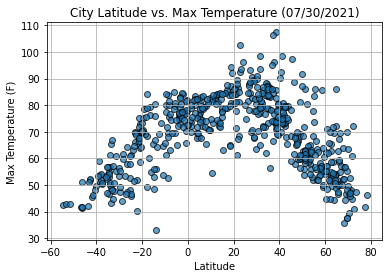

In [7]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], alpha=0.7, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (07/30/2021)')
plt.grid()
plt.savefig('output_data/fig1.png')
plt.show()


## Latitude vs. Humidity Plot

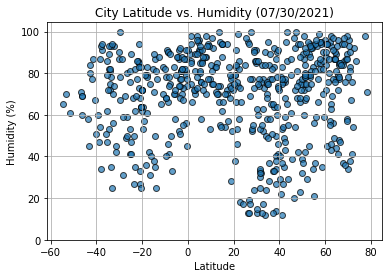

In [8]:
plt.scatter(city_data['Lat'], city_data['Humidity'], alpha=0.7, edgecolors ="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (07/30/2021)')
plt.yticks([ 0, 20,40,60,80,100])
plt.savefig('output_data/fig2.png')
plt.show()


## Latitude vs. Cloudiness Plot

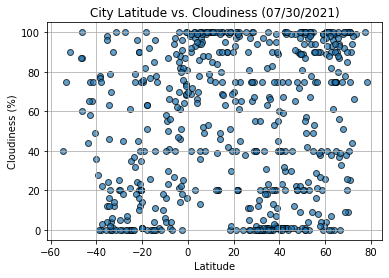

In [9]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'], alpha=0.7, edgecolor ='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (07/30/2021)")
plt.grid()
plt.savefig('output_data/fig3.png')
plt.show()


## Latitude vs. Wind Speed Plot

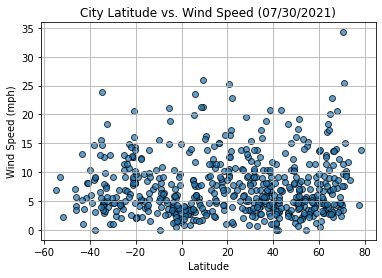

In [10]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], alpha=0.7, edgecolor ='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (07/30/2021)")
plt.grid()
plt.savefig('output_data/fig4.png')
plt.show()


## Linear Regression

In [11]:
#make northern and southern hemisphere variables
north= city_data['Lat']>0
south = city_data['Lat']<0
north_hemisphere=city_data[north]
south_hemisphere=city_data[south]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

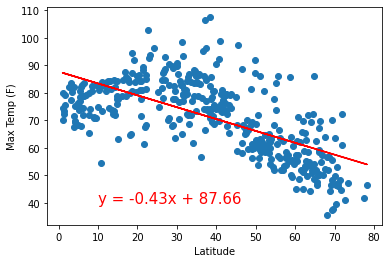

The r-value is : 0.4211213636136136


In [12]:
x_values_north = north_hemisphere['Lat']
y_values_north_temp = north_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_north, y_values_north_temp)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_temp)
plt.plot(x_values_north, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.annotate(line_eq, (10,40), fontsize=15, color = 'red')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

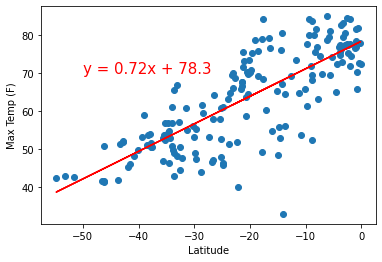

The r-value is : 0.6129831782566936


In [13]:
x_values_south = south_hemisphere['Lat']
y_values_south_temp = south_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_south , y_values_south_temp)
regress_values = x_values_south  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south , y_values_south_temp)
plt.plot(x_values_south , regress_values, "r-")
plt.annotate(line_eq, (-50,70), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

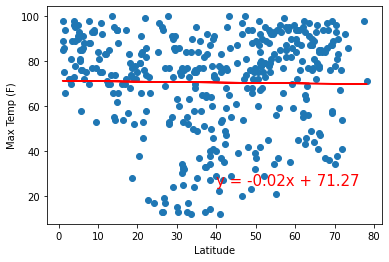

The r-value is : 0.0003058984675021762


In [14]:

y_values_north_humid = north_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_north, y_values_north_humid)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_humid)
plt.plot(x_values_north, regress_values, "r-")
plt.annotate(line_eq, (40, 25), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

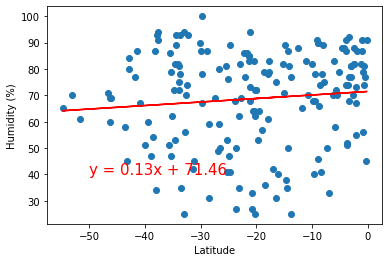

The r-value is : 0.009997717652807221


In [21]:
y_values_south_humid = south_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_south , y_values_south_humid)
regress_values = x_values_south  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south , y_values_south_humid)
plt.plot(x_values_south , regress_values, "r-")
plt.annotate(line_eq, (-50,40), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

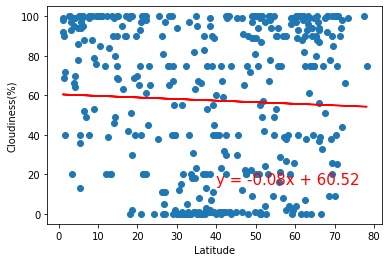

The r-value is : 0.0018272507164684949


In [16]:

y_values_north_cloud = north_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_north, y_values_north_cloud)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_cloud)
plt.plot(x_values_north, regress_values, "r-")
plt.annotate(line_eq, (40, 15), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

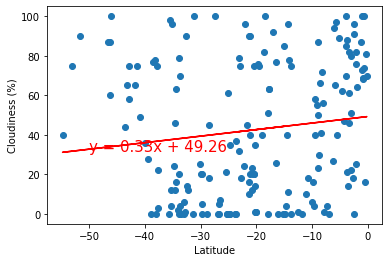

The r-value is : 0.017222361634238428


In [17]:
y_values_south_cloud = south_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_south , y_values_south_cloud)
regress_values = x_values_south  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south , y_values_south_cloud)
plt.plot(x_values_south , regress_values, "r-")
plt.annotate(line_eq, (-50,32), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

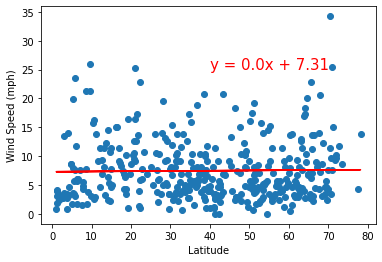

The r-value is : 0.0002996378578998065


In [18]:

y_values_north_wind = north_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_north, y_values_north_wind)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_wind)
plt.plot(x_values_north, regress_values, "r-")
plt.annotate(line_eq, (40, 25), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

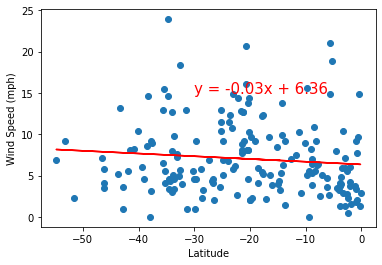

The r-value is : 0.010295607433262712


In [19]:
y_values_south_wind = south_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_south , y_values_south_wind)
regress_values = x_values_south  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south , y_values_south_wind)
plt.plot(x_values_south , regress_values, "r-")
plt.annotate(line_eq, (-30, 15), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f"The r-value is : {rvalue**2}")